In [4]:
from FitsCompanion import *

Define variables:

In [5]:
ra, dec = 64.9066, 2.4151

cutout_center = SkyCoord(ra, dec, unit='deg')
cutout_size = Angle(80.899992 * u.arcmin)

from regions import CircleSkyRegion

r200 = CircleSkyRegion(SkyCoord(ra, dec, unit='deg'), cutout_size)

fig_path_data_red="figs/data_reduction/"
fig_path_data_analysis="figs/data_analysis/"

# Data Reduction

### Image Creation

In [6]:
tm0_raw_low_energy = PrimCompanion().from_fits("../data/raw_images/c010_em01_NGC1550_combined_tiles_0_raw_0.2-2.3keV.fits")
tm0_raw_mid_energy = PrimCompanion().from_fits("../data/raw_images/c010_em01_NGC1550_combined_tiles_0_raw_2.3-6.0keV.fits")
tm0_raw_high_energy = PrimCompanion().from_fits("../data/raw_images/c010_em01_NGC1550_combined_tiles_0_raw_6.0-9.0keV.fits")
smooth_tm0_raw_low_energy = tm0_raw_low_energy.fgauss(4)
smooth_tm0_raw_mid_energy = tm0_raw_mid_energy.fgauss(4)
smooth_tm0_raw_high_energy = tm0_raw_high_energy.fgauss(4)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58904.739618 from DATE-OBS.
Set MJD-END to 58918.743704 from DATE-END'. [astropy.wcs.wcs]


In [7]:
smooth_tm0_raw_low_energy.plot(norm="log", vmin=3.16e-4, vmax=3.16e-1, grid=False, axis_label=False, axis_ticks=False,cbar_labelsize=10, savefig=f"{fig_path_data_red}combined_tiles_0_raw_0.2-2.3keV.pdf")
smooth_tm0_raw_mid_energy.plot(norm="log", vmin=3.16e-4, vmax=3.16e-1, grid=False, axis_label=False, axis_ticks=False,cbar_labelsize=10, savefig=f"{fig_path_data_red}combined_tiles_0_raw_2.3-6.0keV.pdf")
smooth_tm0_raw_high_energy.plot(norm="log", vmin=3.16e-4, vmax=3.16e-1, grid=False, axis_label=False, axis_ticks=False,cbar_labelsize=10, savefig=f"{fig_path_data_red}combined_tiles_0_raw_6.0-9.0keV.pdf")

### SPF-Filtering and PIB-Corr

In [7]:
tm0_clfilt = PrimCompanion().from_fits("../data/filtered/PIBsub_0.2-2.3_combinedtiles/c010_em01_NGC1550_combined_tiles_0_CLevlist_0.20.8-2.3keV.fits")
smooth_tm0_clfilt = tm0_clfilt.cutout(position=cutout_center, size=cutout_size * 2.2).fgauss(4)

tm0_clBGSUB = PrimCompanion().from_fits("../data/filtered/PIBsub_0.2-2.3_combinedtiles/c010_em01_NGC1550_combined_tiles_0_CLevlistBGSUB_0.20.8-2.3keV.fits")
smooth_tm0_clBGSUB = tm0_clBGSUB.cutout(position=cutout_center, size=cutout_size * 2.2).fgauss(4)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58904.739630 from DATE-OBS.
Set MJD-END to 58918.743669 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58904.739630 from DATE-OBS.
Set MJD-END to 58918.743669 from DATE-END'. [astropy.wcs.wcs]


In [19]:
a = (tm0_clfilt.data - tm0_clBGSUB.data)
b = tm0_clfilt.data

In [22]:
np.divide(a, b, out=np.zeros_like(a), where=b!=0).max() * 100

0.10558962821960449

In [5]:
tm0_BGMAP = PrimCompanion().from_fits("../data/filtered/PIBsub_0.2-2.3_combinedtiles/c010_em01_NGC1550_combined_tiles_0_CLBGmap_0.20.8-2.3keV.fits")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58904.739630 from DATE-OBS.
Set MJD-END to 58918.743669 from DATE-END'. [astropy.wcs.wcs]


(<Figure size 2400x1440 with 2 Axes>,
 <WCSAxesSubplot:xlabel='Right ascension', ylabel='Declination'>)

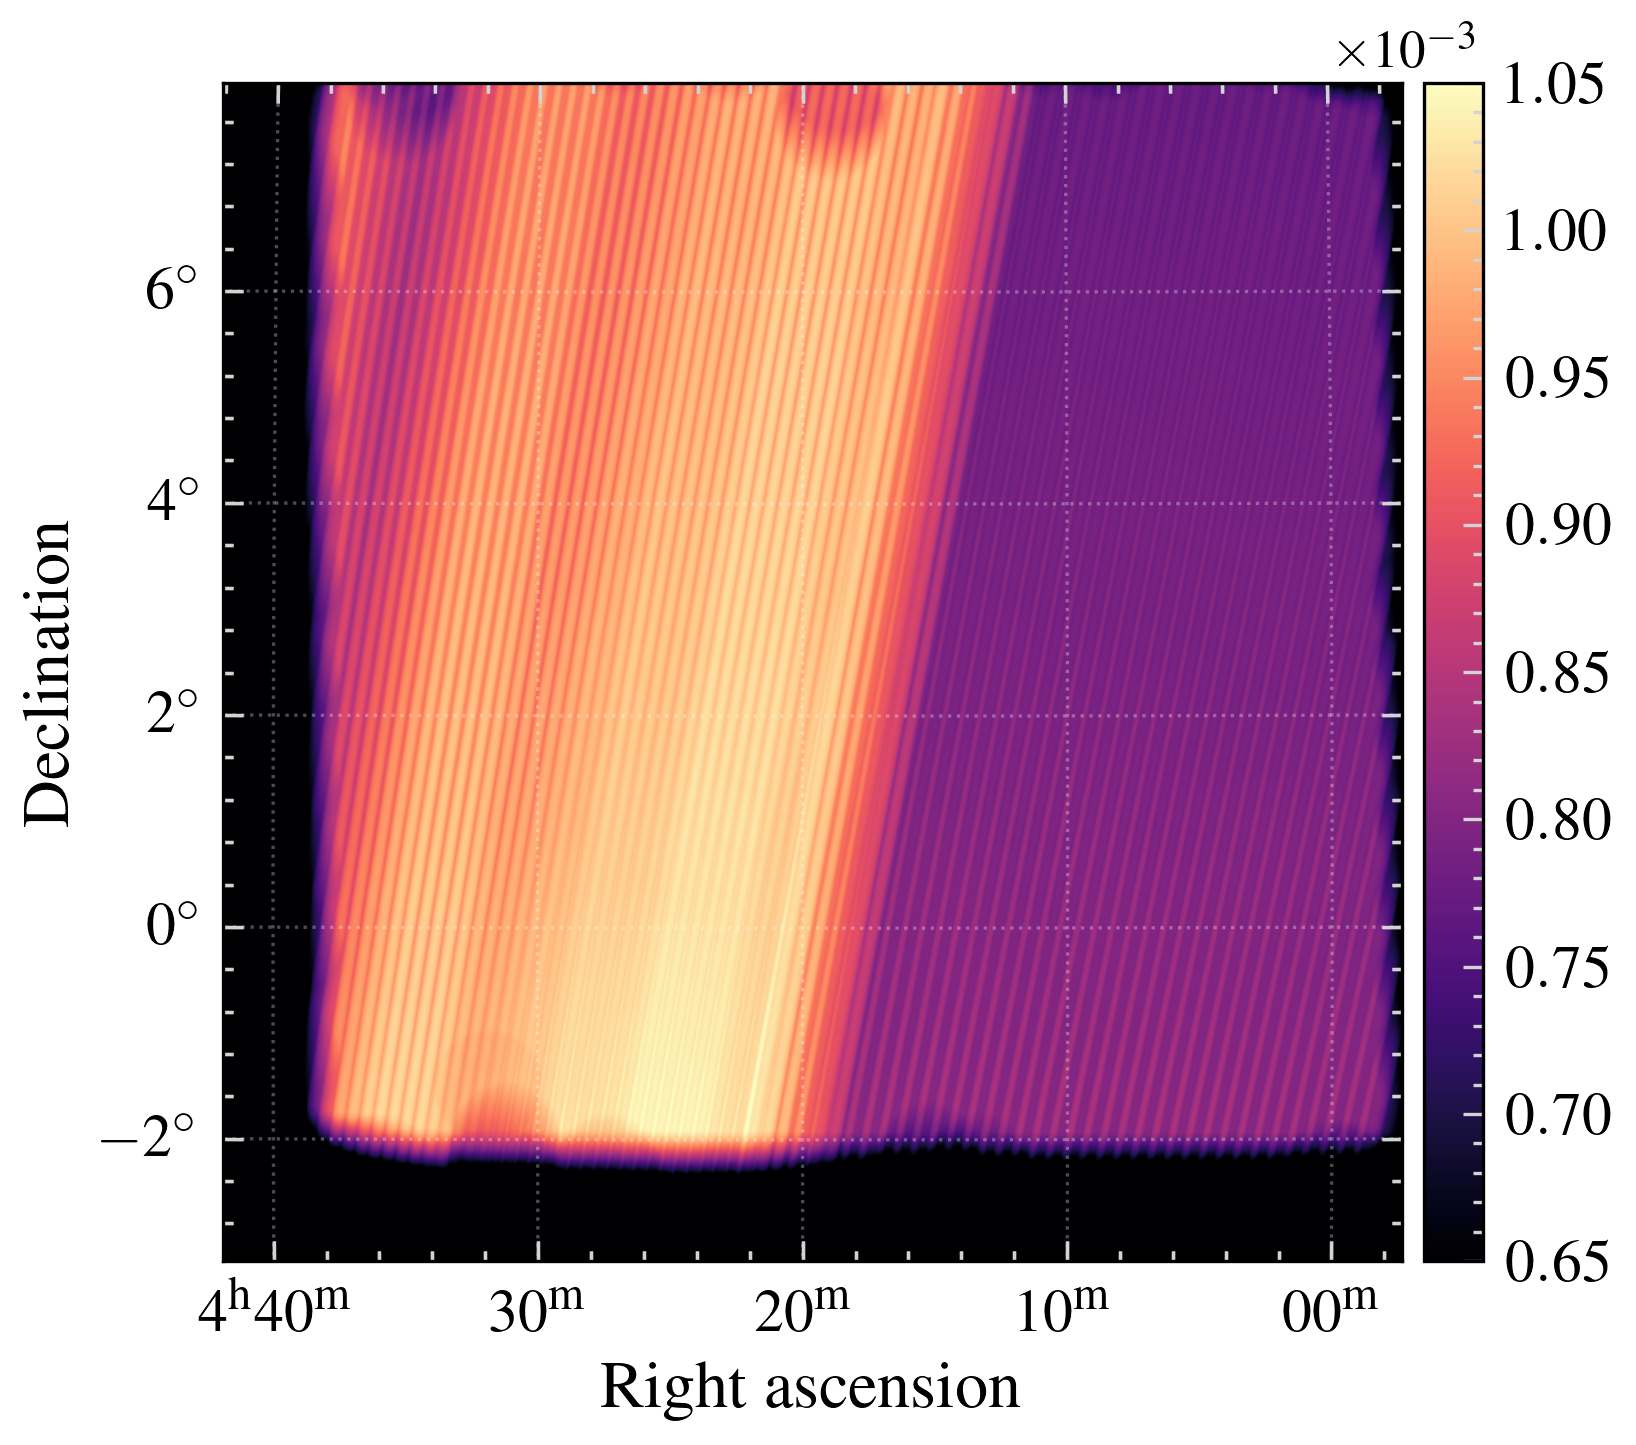

In [10]:
tm0_BGMAP.plot(norm="lin", vmin=6.5e-4, vmax=1.05e-3, savefig=f"{fig_path_data_red}PIB_MAP.pdf")

# Data Analyis